### ROOT

[ROOT](https://root.cern.ch/) needs a special mention. It is still nowadays, and by far, the most convenient tool to store and manage complex datasets pertaining physics experiments where "events" are recorded, in particular High Energy, Nuclear, Astro physics.

ROOT allows a nested structure, with complex data objects (classes) and references between them. For instance, a variable number of attributes/features/variables can be set on a per-event basis, which is something that other data structures are not really optimized to do.

ROOT is the C++ implementation of PAW (Fortran), which was the plotting and I/O tool for CERN experiments. Later on, ROOT evolved in a much more complete and complex tool, adding new packages like PyROOT (finally!), which provided an (almost) fully functional Python interpreter which made ROOT much more user friendly. Its core is still C++ and uses a debatable memory management method, which is however hidden from the common user.

In spite of its many flaws, it's I/O and the statistical analysis tools included are formidable.

Installing ROOT is [not trivial](https://root.cern/install/).

Fortunately, ROOT files can be opened with a non-ROOT library, [uproot](https://github.com/scikit-hep/uproot). See the [documentation](https://uproot.readthedocs.io/en/latest/basic.html).

In [ ]:
!wget https://scikit-hep.org/uproot3/examples/Zmumu.root -P data/

In [3]:
import uproot
events = uproot.open("Zmumu.root:events") # pass file name : name of the TTree

In [4]:
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Type                 | char*                    | AsStrings()
Run                  | int32_t                  | AsDtype('>i4')
Event                | int32_t                  | AsDtype('>i4')
E1                   | double                   | AsDtype('>f8')
px1                  | double                   | AsDtype('>f8')
py1                  | double                   | AsDtype('>f8')
pz1                  | double                   | AsDtype('>f8')
pt1                  | double                   | AsDtype('>f8')
eta1                 | double                   | AsDtype('>f8')
phi1                 | double                   | AsDtype('>f8')
Q1                   | int32_t                  | AsDtype('>i4')
E2                   | double                   | AsDtype('>f8')
px2                  | double                   | AsDtype('>f

<AxesSubplot:>

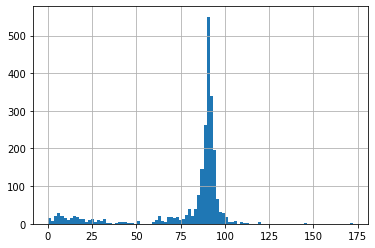

In [5]:
e1 = events['E1'].array(library="np") # get numpy array - default library uses 'awkward'

mass = events['M'].array(library="pd") # "pd" returns pandas Series
mass.hist(bins=100)